#  **Tugas Kelompok - Machine Learning**

**Mata Kuliah :** Machine Learning  
**Topik :** Medical Cost Prediction  
**Dosen Pengampu :** Alim Misbullah, S.Si., M.S.  
**Kelompok :** 5  
**Anggota Kelompok:**
- Mila Lestari (2208107010002)
- Zahra Zafira (2208107010040)
- Pryta Rosela (2208107010046)
- Cut Sula Fhatia Rahma (2208107010048)
- Widya Nurul Sukma (2208107010054)

---

##  Dataset : Medical Cost Prediction
**Deskripsi :** Dataset ini berisi informasi tentang pasien dan biaya medis yang dikeluarkan, digunakan untuk memprediksi biaya pengobatan berdasarkan faktor-faktor individu.

- **Target (Variabel Dependen):** Biaya pengobatan
- **Features (Variabel Independen):**  
  - Usia  
  - Indeks Massa Tubuh (BMI)  
  - Jumlah Anak  
  - Riwayat Merokok  
  - Jenis Kelamin
  - Wilayah  


# **Import Library**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# **Load Data and Analysis**

In [ ]:
# ### Reading the data and creating a dataframe
# from google.colab import files

# # Upload file
# uploaded = files.upload()

# # Ambil nama file yang diunggah
# filename = list(uploaded.keys())[0]

# # Baca dataset
# df = pd.read_csv(filename)

# # Tampilkan 3 baris pertama
# df.head(5)

import pandas as pd

df = pd.read_csv('/content/insurance.csv')
df.head(5)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [ ]:
#numbers of row and column
df.shape

(2772, 7)

In [ ]:
#getting some info of Dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2772 entries, 0 to 2771
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       2772 non-null   int64  
 1   sex       2772 non-null   object 
 2   bmi       2772 non-null   float64
 3   children  2772 non-null   int64  
 4   smoker    2772 non-null   object 
 5   region    2772 non-null   object 
 6   charges   2772 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 151.7+ KB


In [ ]:
#checking fro missing value'
df.isnull().sum()

,0
age,0
sex,0
bmi,0
children,0
smoker,0
region,0
charges,0


Semua kolom dalam dataset tidak memiliki nilai kosong (missing values) artinya data ini sudah bersih dan tidak memerlukan penanganan missing values sebelum masuk ke tahap analisis atau pemodelan.

In [ ]:
#statical Measure of the dataset
df.describe()

,age,bmi,children,charges
count,2772.000000,2772.000000,2772.000000,2772.000000
mean,39.109668,30.701349,1.101732,13261.369959
std,14.081459,6.129449,1.214806,12151.768945
min,18.000000,15.960000,0.000000,1121.873900
25%,26.000000,26.220000,0.000000,4687.797000
50%,39.000000,30.447500,1.000000,9333.014350
75%,51.000000,34.770000,2.000000,16577.779500
max,64.000000,53.130000,5.000000,63770.428010


### Statistik Deskriptif Kolom Numerik

Kolom yang dianalisis: `age`, `bmi`, `children`, dan `charges`

- **`age` (usia):**  
  Rata-rata usia peserta adalah **39 tahun**, dengan usia termuda **18 tahun** dan tertua **64 tahun**.

- **`bmi` (indeks massa tubuh):**  
  Rata-rata BMI adalah **30.70**, termasuk kategori **overweight**, dengan nilai minimum **15.96** dan maksimum **53.13**.

- **`children` (jumlah anak):**  
  Rata-rata jumlah anak adalah **1.1**, dengan sebagian besar responden memiliki **0–2 anak**.

- **`charges` (biaya pengobatan):**  
  Rata-rata biaya pengobatan adalah sekitar **13.261 USD**, namun terdapat variasi yang cukup besar, dari sekitar **1.121 USD** hingga **63.770 USD**.


# **Explorative Data Analysis**


## Korelasi Antar Variabel

In [ ]:
df['sex'] = df['sex'].map({'female': 0, 'male': 1})
df['smoker'] = df['smoker'].map({'no': 0, 'yes': 1})
df = pd.get_dummies(df, columns=['region'], drop_first=True)


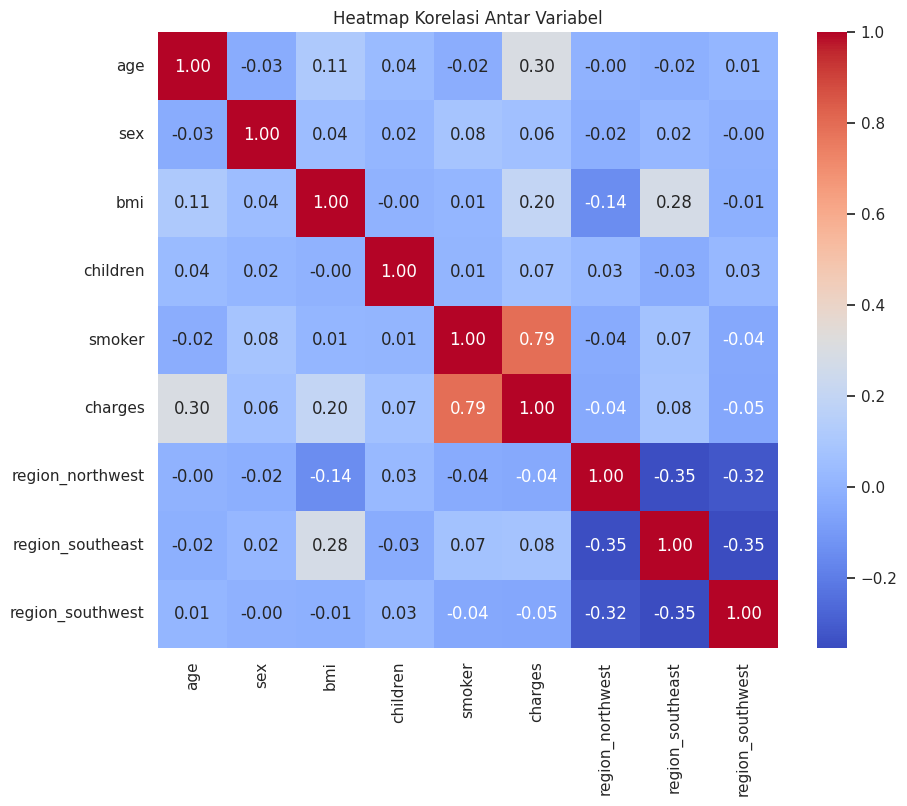

In [ ]:
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Heatmap Korelasi Antar Variabel')
plt.show()


Dengan menggunakan heatmap di atas, kita dapat melihat variabel mana yang paling berkorelasi dengan `charges` (biaya asuransi).  
Dapat dilihat bahwa `smoker`, `age`, dan `bmi` menunjukkan korelasi yang cukup tinggi terhadap `charges`.


## Visualisasi Distribusi Charges

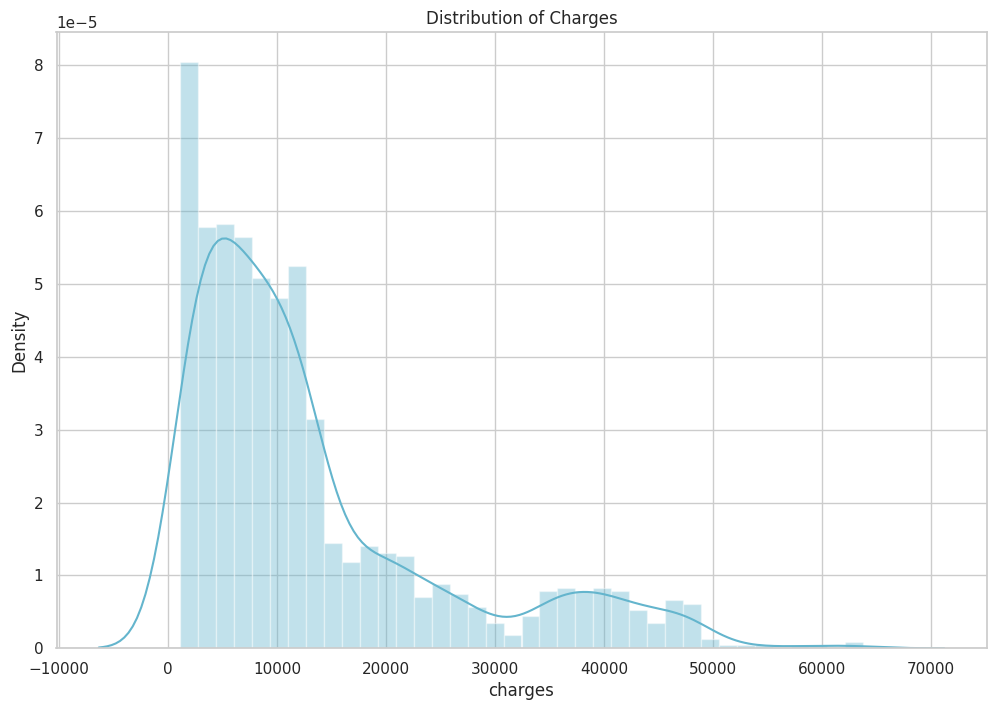

<Figure size 640x480 with 0 Axes>

In [ ]:
sns.set(style='whitegrid')
f, ax = plt.subplots(1,1, figsize=(12, 8))
ax = sns.distplot(df['charges'], kde = True, color = 'c')
plt.title('Distribution of Charges')
plt.show()
# save the plot into a file
plt.savefig('Distribution_of_Charges.png')



Kode ini membuat histogram distribusi dari kolom **'charges'** dalam dataset `df`, dengan tambahan **kurva KDE** untuk melihat pola distribusi.  

- **`sns.distplot(df['charges'], kde=True, color='c')`** → Membuat histogram dengan kurva KDE berwarna cyan.  
- **`plt.title('Distribution of Charges')`** → Menambahkan judul pada plot.  
- **`plt.savefig('Distribution_of_Charges.png')`** → Menyimpan plot sebagai gambar PNG.  


## Visualisasi Distribusi BMI

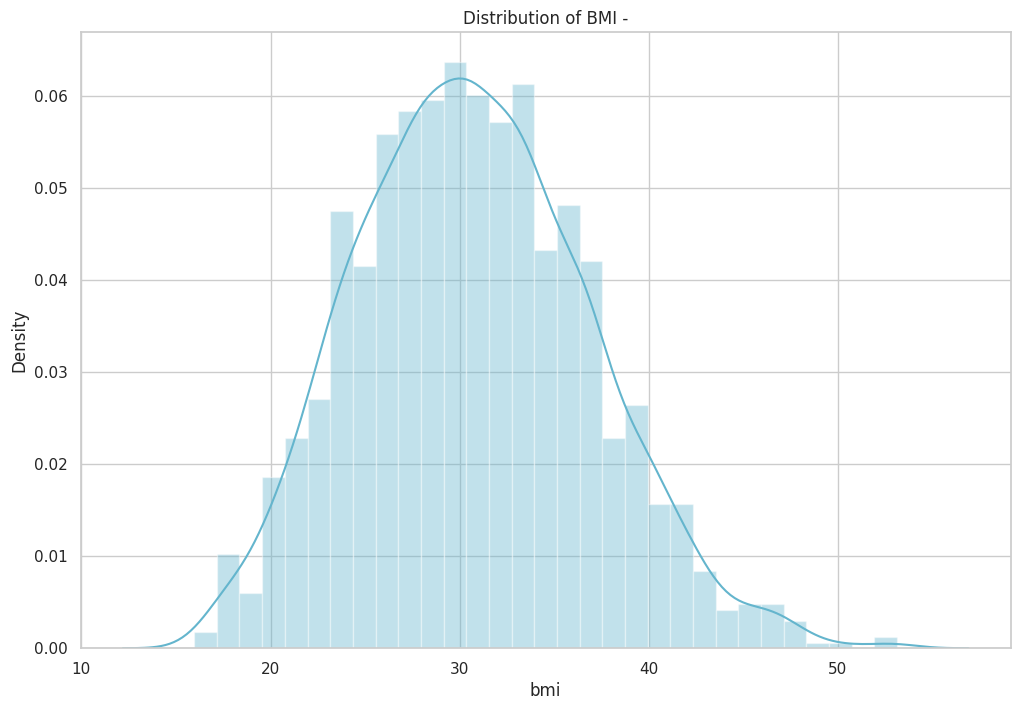

In [ ]:
sns.set(style='whitegrid')
f, ax = plt.subplots(1,1, figsize=(12, 8))
ax = sns.distplot(df['bmi'], kde = True, color = 'c')
plt.title('Distribution of BMI -')
plt.show()



Kode ini membuat histogram distribusi dari kolom **'bmi'** dalam dataset `df`, dengan tambahan **kurva KDE** untuk melihat pola distribusi.  

- **`sns.distplot(df['bmi'], kde=True, color='c')`** → Membuat histogram BMI dengan kurva KDE berwarna cyan.  
- **`plt.title('Distribution of BMI')`** → Menambahkan judul pada plot.  
- **`plt.show()`** → Menampilkan plot.  

## Visualisasi Distribusi Usia

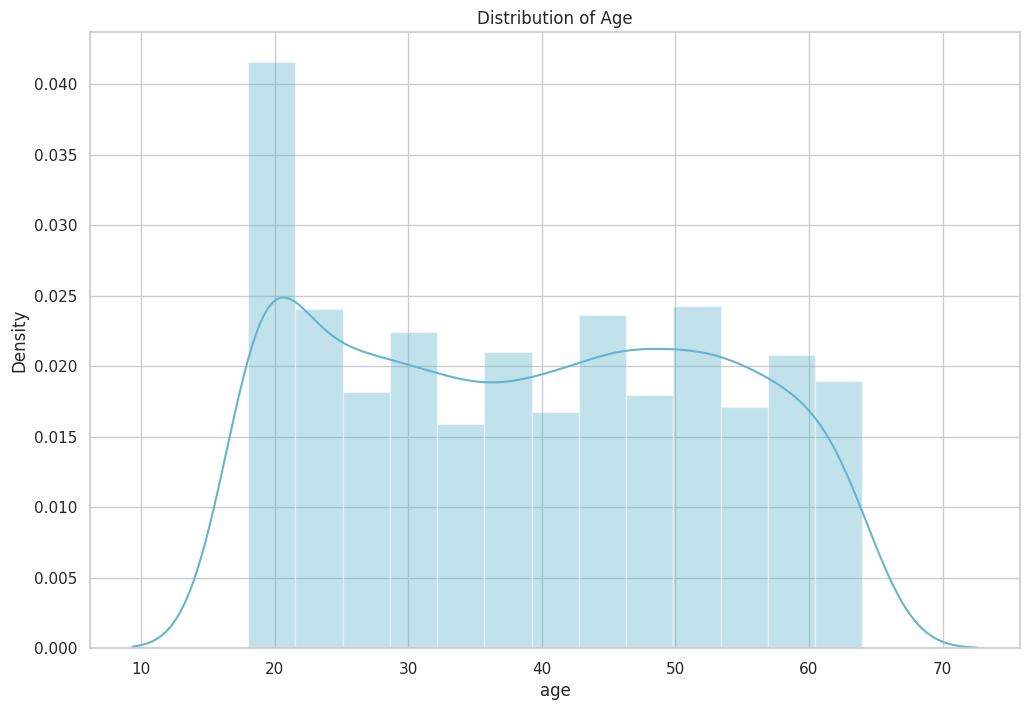

In [ ]:
sns.set(style='whitegrid')
f, ax = plt.subplots(1,1, figsize=(12, 8))
ax = sns.distplot(df['age'], kde = True, color = 'c')
plt.title('Distribution of Age')
plt.show()



Kode ini digunakan untuk memvisualisasikan distribusi **usia** dalam dataset `df`:

- **`sns.distplot(df['age'], kde=True, color='c')`** → Membuat histogram usia dengan **kurva KDE** berwarna cyan.
- **`plt.title('Distribution of Age')`** → Menambahkan judul pada plot.
- **`plt.show()`** → Menampilkan plot.

Ini membantu untuk melihat sebaran dan pola distribusi **usia** dalam dataset.


## Visualisasi Jumlah Data Berdasarkan Region

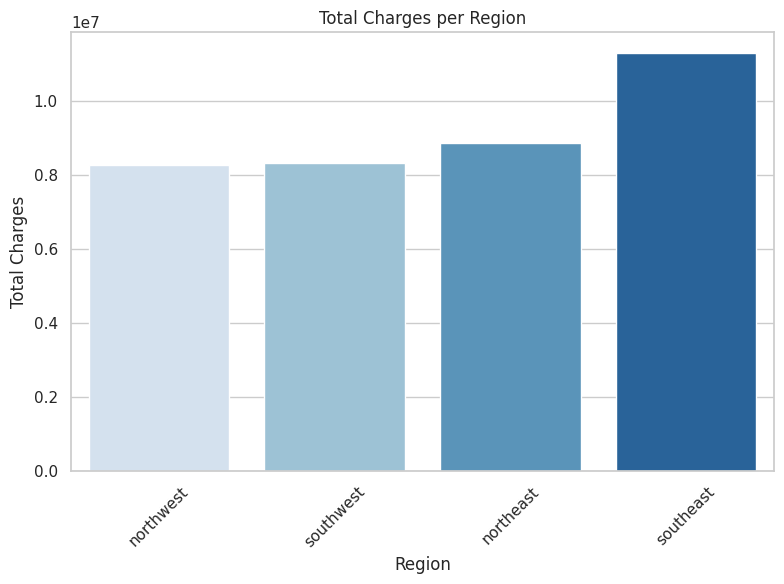

In [ ]:
df = pd.read_csv('/content/insurance.csv')
charges = df.groupby('region')['charges'].sum().sort_values(ascending=True)

plt.figure(figsize=(8,6))
sns.barplot(x=charges.index, y=charges.values, palette='Blues')
plt.title('Total Charges per Region')
plt.xlabel('Region')
plt.ylabel('Total Charges')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



Kode ini digunakan untuk menghitung total **charges** berdasarkan **region** dan kemudian menampilkan 5 region dengan total **charges** terendah menggunakan **barplot**:

1. **`df['charges'].groupby(df.region).sum().sort_values(ascending=True)`**  
   - Mengelompokkan data berdasarkan **region** dan menghitung total **charges** untuk setiap region.
   - Hasilnya diurutkan berdasarkan nilai total **charges** secara **ascending** (terendah ke tertinggi).

2. **`plt.subplots(1, 1, figsize=(8, 6))`**  
   - Membuat figure dan satu subplot dengan ukuran **8x6 inches**.

3. **`sns.barplot(x=charges.head().index, y=charges.head(), palette='Blues')`**  
   - Membuat **barplot** dengan data yang diambil dari 5 region teratas berdasarkan total **charges** (menggunakan `head()` untuk mengambil 5 data pertama).
   - Warna plot menggunakan palet **'Blues'**.

Dari kode ini kita dapat melihat visualisasi **charges** berdasarkan **region** dengan fokus pada 5 region dengan total **charges** terendah.

Dari plot di atas, kita dapat melihat bahwa region **Southeast** memiliki **charges** tertinggi dan region **Southwest** memiliki **charges** terendah.


## Visualisasi Jumlah Data Perokok dan Non Perokok

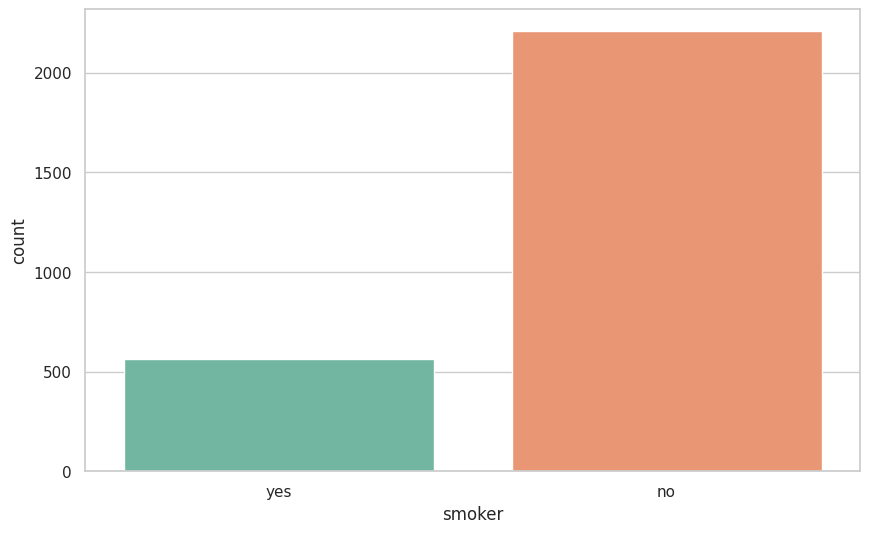

In [ ]:
plt.figure(figsize=(10,6))
sns.countplot(data=df, x='smoker', palette='Set2') # Gunakan palet 'Set1' atau palet lainnya
plt.show()



Kode ini digunakan untuk membuat **countplot** yang menunjukkan jumlah orang yang merokok dan tidak merokok dalam dataset `df`:

1. **`plt.figure(figsize=(10,6))`**  
   - Membuat figure dengan ukuran **10x6 inches**.

2. **`sns.countplot(data=df, x='smoker', palette='Set2')`**  
   - Membuat **countplot** untuk kolom **'smoker'**, yang menunjukkan jumlah kategori 'yes' (perokok) dan 'no' (tidak merokok).
   - Menggunakan palet warna **'Set2'** untuk visualisasi warna.

3. **`plt.show()`**  
   - Menampilkan plot.


Dari plot yang dihasilkan, terlihat bahwa jumlah orang yang **tidak merokok** (**'no'**) lebih banyak dibandingkan dengan yang merokok (**'yes'**). Ini menunjukkan bahwa mayoritas individu dalam dataset ini tidak merokok.

## Visualisasi Jumlah Data/pasien Berdasarkan Region





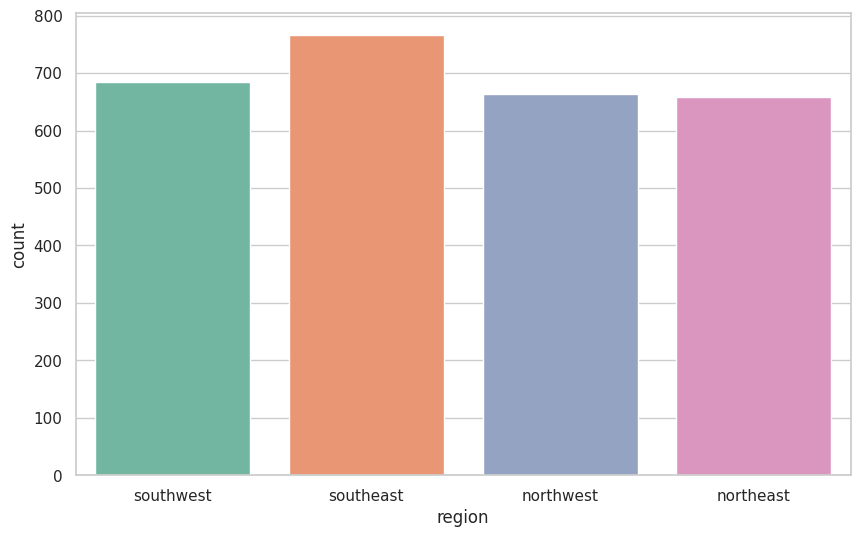

In [ ]:
plt.figure(figsize=(10,6))
sns.countplot(data=df, x='region',  palette='Set2')
plt.show()


Kode berikut digunakan untuk membuat visualisasi jumlah data berdasarkan kolom `region` dalam dataset `df`

Dari visualisasi yang ditampilkan:
- Wilayah `southeast` memiliki jumlah data tertinggi.
- Wilayah `southwest`, `northwest`, dan `northeast` memiliki jumlah data yang hampir seimbang.
- Tidak ada ketimpangan yang ekstrem dalam distribusi jumlah data antar region.





## Visualisasi Jumlah Data Berdasarkan Jenis Kelamin

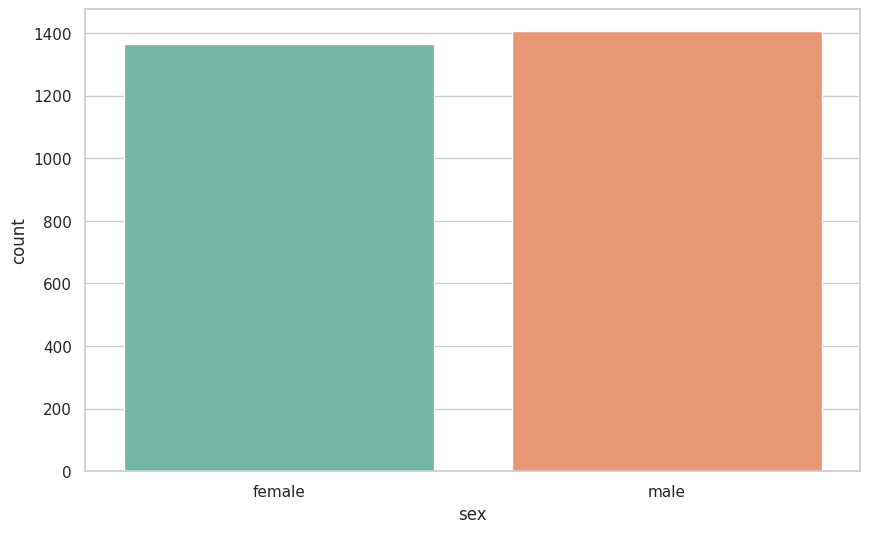

In [ ]:
plt.figure(figsize=(10,6))
sns.countplot(data=df, x='sex', palette='Set2')
plt.show()

Dari visualisasi countplot yang ditampilkan:  
- Jumlah data untuk kategori **male** dan **female** relatif seimbang.  
- **Male** memiliki jumlah sedikit lebih banyak dibandingkan **female**, tetapi perbedaannya tidak signifikan.  
- Distribusi yang hampir merata ini menunjukkan bahwa data yang digunakan cukup representatif untuk kedua jenis kelamin.  

## Visualisasi Distribusi Perokok Berdasarkan Jenis Kelamin

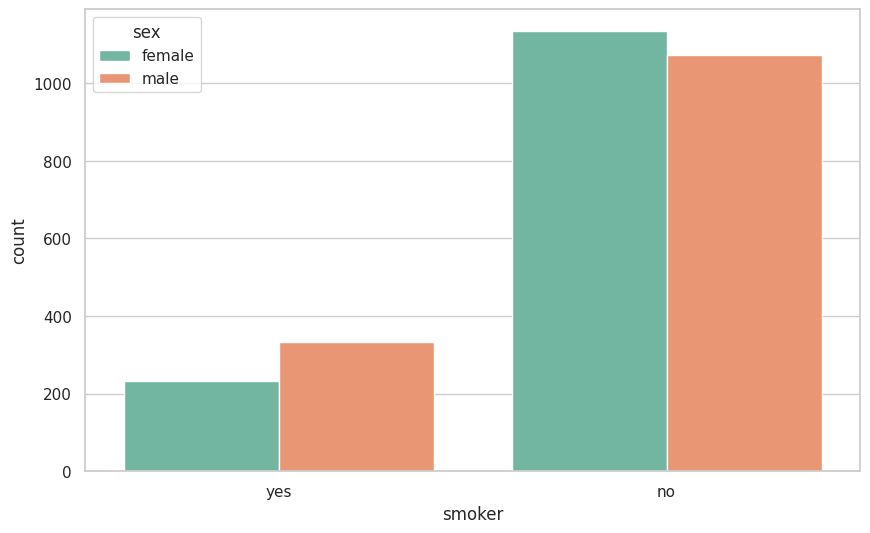

In [ ]:
plt.figure(figsize=(10,6))
sns.countplot(data=df, x='smoker', hue='sex',  palette='Set2')
plt.show()

 Dari visualisasi countplot yang menampilkan jumlah perokok berdasarkan jenis kelamin:  
- **Kategori "No" (tidak merokok) lebih banyak diisi oleh female** dibandingkan male.  
- **Kategori "Yes" (merokok) lebih banyak diisi oleh male** dibandingkan female.  
- Hal ini menunjukkan bahwa dalam dataset ini, laki-laki lebih cenderung merokok dibandingkan perempuan, sedangkan perempuan lebih banyak yang tidak merokok.  

## Visualisasi Jumlah Status Merokok Berdasarkan Wilayah

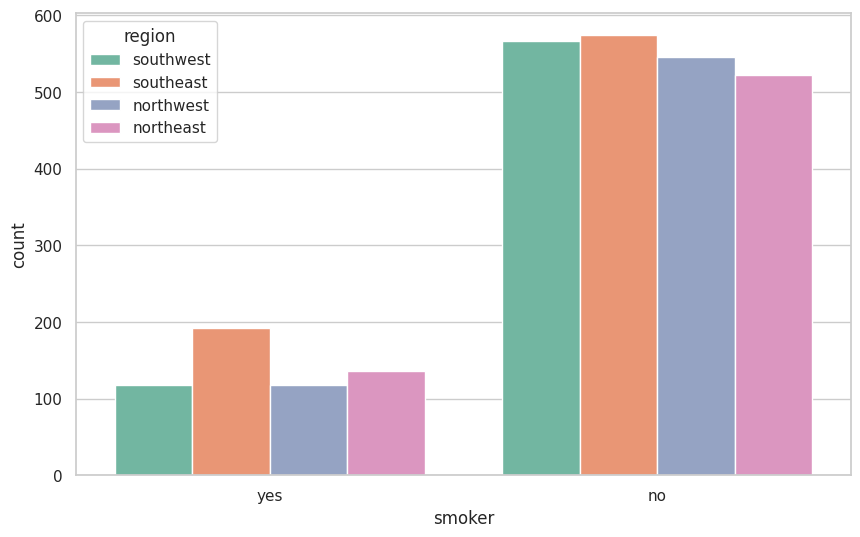

In [ ]:
plt.figure(figsize=(10,6))
sns.countplot(data=df, x='smoker', hue='region',  palette='Set2')
plt.show()

Grafik yang ditampilkan adalah **countplot** yang menunjukkan distribusi jumlah perokok (`smoker`) berdasarkan wilayah (`region`). Berikut beberapa kesimpulan yang dapat diambil:  
- Wilayah **Southeast** memiliki proporsi perokok lebih tinggi dibandingkan wilayah lain.  
- Wilayah **Southwest, Northwest, dan Northeast** memiliki jumlah perokok yang lebih sedikit dengan distribusi yang hampir merata.  
- Populasi non-perokok jauh lebih tinggi dibandingkan perokok di semua wilayah.  

## Visualisasi Jumlah Memiliki Anak Berdasarkan Wilayah

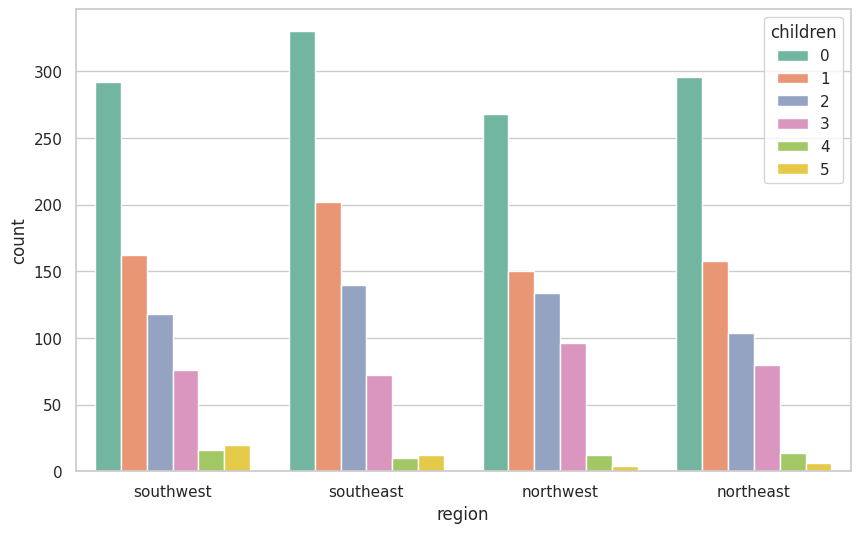

In [ ]:
plt.figure(figsize=(10,6))
sns.countplot(data=df, hue='children', x='region',  palette='Set2')
plt.show()

Dari grafik diatas dapat diambil kesimpulan bahwa:
- Mayoritas individu di semua wilayah **tidak memiliki anak** (kategori 0).  
- Jumlah individu menurun seiring bertambahnya jumlah anak.  
- **Wilayah Southeast memiliki jumlah individu tanpa anak tertinggi.**  
- **Individu dengan 4 atau 5 anak sangat sedikit di semua wilayah.**

## Boxplot Perbandingan Biaya Pengobatan Berdasarkan Status Merokok

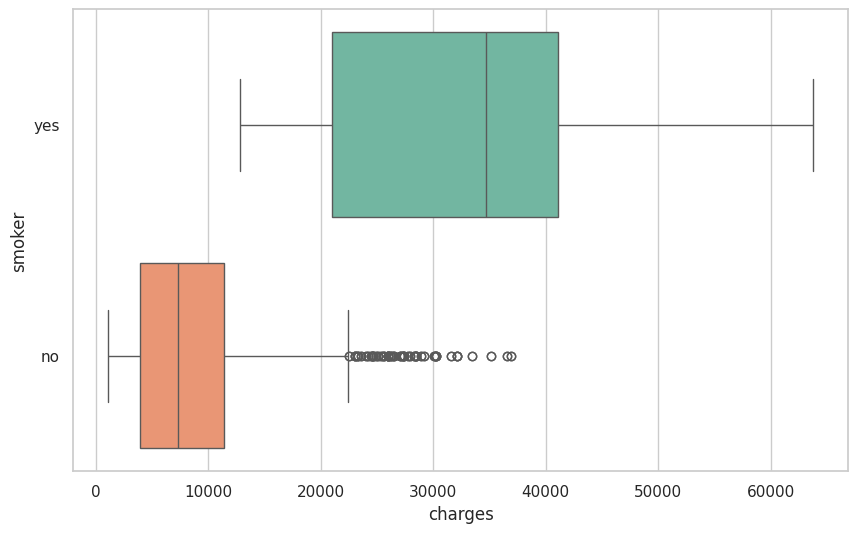

In [ ]:
plt.figure(figsize=(10,6))
sns.boxplot(data=df, x='charges', y='smoker',  palette='Set2')
plt.show()

Boxplot ini membandingkan distribusi biaya pengobatan (`charges`) antara perokok dan non-perokok:

- **Perokok memiliki biaya yang jauh lebih tinggi dibandingkan non-perokok.**  
- **Distribusi biaya perokok lebih luas**, dengan banyak individu membayar lebih dari 30.000.  
- **Non-perokok memiliki biaya lebih rendah dan lebih terkonsentrasi di bawah $15.000.**  
- **Banyak outlier pada non-perokok,** tetapi tetap lebih rendah dibandingkan perokok.

## Boxplot Distribusi Biaya Pengobatan Berdasarkan Status Merokok dan Wilayah

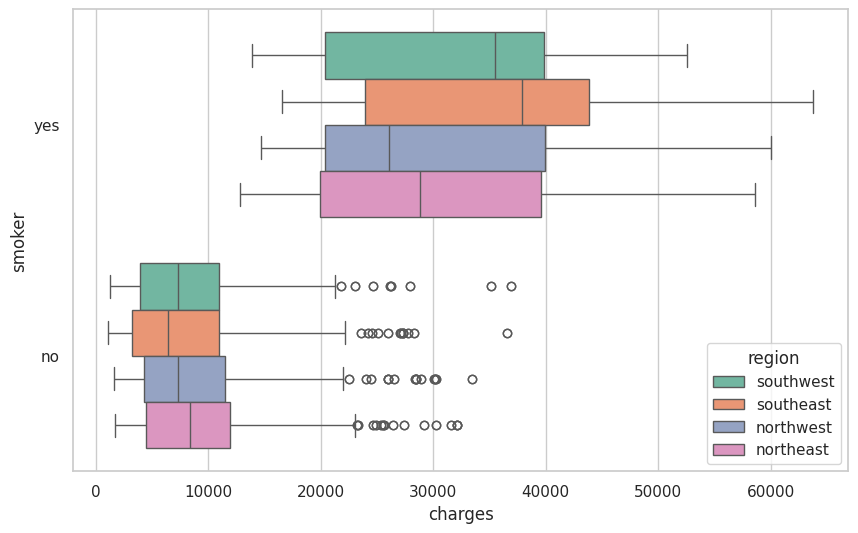

In [ ]:
plt.figure(figsize=(10,6))
sns.boxplot(data=df, x='charges', y='smoker', hue='region',  palette='Set2')
plt.show()

Visualisasi boxplot ini menampilkan distribusi biaya pengobatan (`charges`) berdasarkan status perokok (`smoker`) dan wilayah (`region`):

1. Biaya kesehatan (*charges*) jauh lebih tinggi pada perokok dibandingkan non-perokok, dengan perbedaan yang signifikan.  
2. Di antara perokok, wilayah *southeast* memiliki distribusi biaya yang lebih tinggi dibandingkan wilayah lain.  
3. Non-perokok memiliki distribusi biaya yang lebih rendah dan merata di keempat wilayah.  
4. Terdapat beberapa *outlier* pada kelompok non-perokok dengan biaya cukup tinggi, meskipun jumlahnya sedikit.

 ## Boxplot Distribusi Biaya Pengobatan Berdasarkan Status Merokok dan Jenis Kelamin

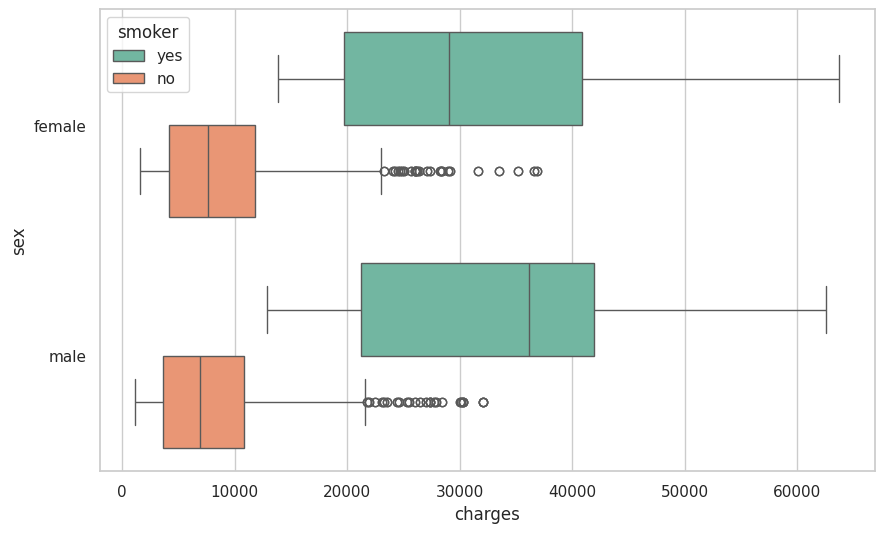

In [ ]:
plt.figure(figsize=(10,6))
sns.boxplot(data=df, x='charges', y='sex', hue='smoker',  palette='Set2')
plt.show()

Kesimpulan singkat:  
1. Baik pada laki-laki maupun perempuan, perokok memiliki biaya kesehatan (*charges*) yang jauh lebih tinggi dibandingkan non-perokok.  
2. Distribusi biaya pada perokok perempuan cenderung lebih tinggi daripada perokok laki-laki.  
3. Non-perokok, baik laki-laki maupun perempuan, memiliki distribusi biaya yang relatif rendah dan merata.  
4. Terdapat beberapa *outlier* pada kelompok non-perokok dengan biaya tinggi, tetapi jumlahnya sedikit.

## Scatter Plot Biaya Pengobatan dan BMI Berdasarkan Status Merokok

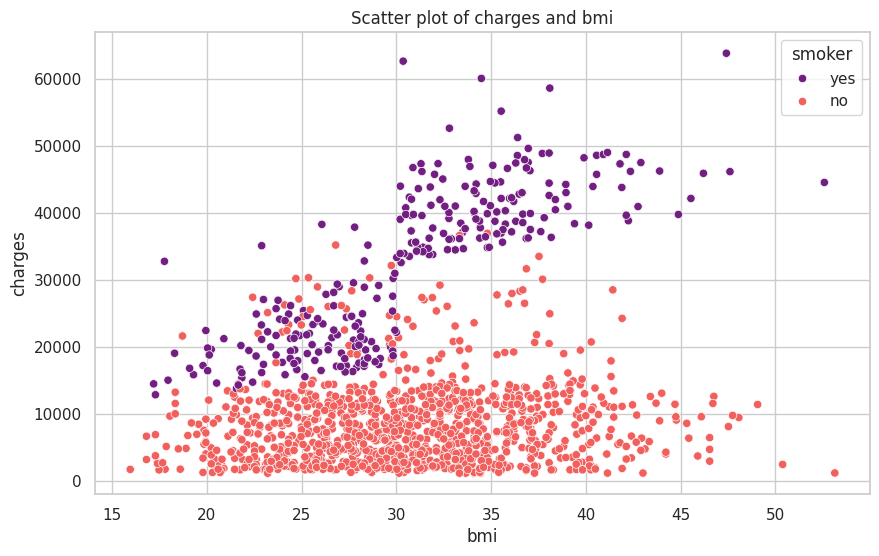

In [ ]:
plt.figure(figsize=(10,6))
ax = sns.scatterplot(x='bmi',y='charges',data=df,palette='magma',hue='smoker')
ax.set_title('Scatter plot of charges and bmi')
plt.show()



Plot ini menunjukkan hubungan antara **BMI** dan **biaya pengobatan (`charges`)**, dengan perbedaan warna berdasarkan status merokok (`smoker`):

- **Terdapat korelasi positif antara BMI dan biaya pengobatan**, terutama pada perokok.
- **Perokok dengan BMI tinggi cenderung memiliki biaya pengobatan yang sangat tinggi**, terlihat dari titik-titik yang tersebar jauh ke atas.
- **Non-perokok memiliki sebaran biaya pengobatan yang lebih terkonsentrasi**, meskipun tetap ada beberapa outlier dengan biaya tinggi.
- Grafik ini menunjukkan bahwa kombinasi BMI tinggi dan kebiasaan merokok berkaitan dengan biaya medis yang jauh lebih besar.


## Visualisasi Distribusi Biaya Kesehatan Berdasarkan Status Merokok

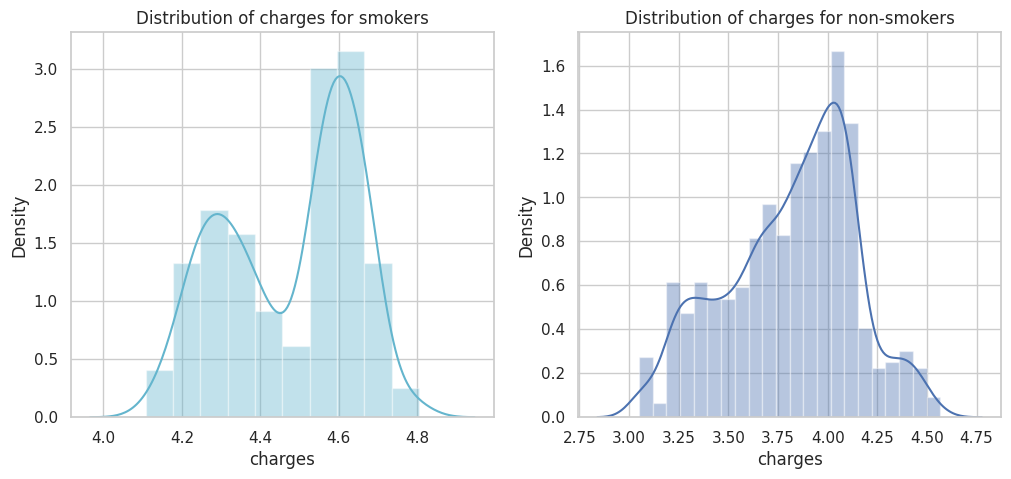

In [ ]:
f= plt.figure(figsize=(12,5))

ax=f.add_subplot(121)
sns.distplot(data[(data.smoker == 1)]["charges"],color='c',ax=ax)
ax.set_title('Distribution of charges for smokers')

ax=f.add_subplot(122)
sns.distplot(data[(data.smoker == 0)]['charges'],color='b',ax=ax)
ax.set_title('Distribution of charges for non-smokers')
plt.show()

Kesimpulan singkat:  
1. Distribusi biaya kesehatan (*charges*) pada perokok menunjukkan dua puncak (*bimodal*), menandakan adanya dua kelompok dengan pola biaya berbeda, dengan banyak perokok yang memiliki biaya tinggi.  
2. Distribusi biaya pada non-perokok cenderung terkonsentrasi pada nilai rendah, dengan sedikit kasus biaya tinggi sebagai *outlier*.  
3. Rata-rata biaya kesehatan perokok jauh lebih tinggi dibandingkan non-perokok, menunjukkan bahwa merokok sangat memengaruhi biaya kesehatan.

# **Preprocessing**

## Pemberian Label (Label Encoding)
Karena model regresi tidak dapat memahami data non-numerik, kita perlu mengkodekan variabel kategori. Oleh karena itu, kita akan menggunakan pemberian label (label encoding).
Pemberian Label adalah teknik yang digunakan untuk mengonversi variabel kategori menjadi variabel numerik dengan memberikan angka unik untuk setiap kategori.

In [ ]:
from sklearn.preprocessing import LabelEncoder
data = df

le1 = LabelEncoder()
le2 = LabelEncoder()
le3 = LabelEncoder()
le1.fit(data.sex.drop_duplicates())
data.sex = le1.transform(data.sex)

le2.fit(data.smoker.drop_duplicates())
data.smoker = le2.transform(data.smoker)

le3.fit(data.region.drop_duplicates())
data.region = le3.transform(data.region)

Kode di atas menggunakan `LabelEncoder` dari `sklearn.preprocessing` untuk mengonversi variabel kategori menjadi nilai numerik. Berikut langkah-langkahnya:

1. **Inisialisasi Encoder**: Membuat tiga objek `LabelEncoder` (le1, le2, le3) untuk masing-masing kolom: `sex`, `smoker`, dan `region`.
2. **Fit dan Transform**:
   - `le1.fit(data.sex.drop_duplicates())` melatih encoder pada kolom `sex` untuk mengetahui kategori unik, kemudian `data.sex = le1.transform(data.sex)` mengubah kategori menjadi angka.
   - Langkah yang sama dilakukan untuk kolom `smoker` dan `region` menggunakan `le2` dan `le3`.

Hasil akhirnya adalah variabel kategori pada kolom-kolom tersebut digantikan dengan angka yang mewakili setiap kategori.

## Encoded data
- Kami juga menambahkan kolom theta0 yang merupakan bias dari model.
Kolom `theta0` ditambahkan ke dalam DataFrame sebagai bias dalam model regresi linier atau model pembelajaran mesin lainnya. Bias ini penting karena memungkinkan model memprediksi nilai meskipun semua fitur lainnya bernilai nol, sehingga meningkatkan fleksibilitas dan akurasi model. Nilai `1` pada kolom `theta0` memastikan bahwa bias selalu ada dan dihitung dalam persamaan model.

In [ ]:
df_main = df
df_main ['theta0'] = 1
df_main .head(3)

,age,sex,bmi,children,smoker,region,charges,theta0
0,19,0,27.90,0,1,3,16884.9240,1
1,18,1,33.77,1,0,2,1725.5523,1
2,28,1,33.00,3,0,2,4449.4620,1


In [ ]:
df_main.describe()

,age,sex,bmi,children,smoker,region,charges,theta0
count,2772.000000,2772.000000,2772.000000,2772.000000,2772.000000,2772.000000,2772.000000,2772.0
mean,39.109668,0.507215,30.701349,1.101732,0.203463,1.532468,13261.369959,1.0
std,14.081459,0.500038,6.129449,1.214806,0.402647,1.103467,12151.768945,0.0
min,18.000000,0.000000,15.960000,0.000000,0.000000,0.000000,1121.873900,1.0
25%,26.000000,0.000000,26.220000,0.000000,0.000000,1.000000,4687.797000,1.0
50%,39.000000,1.000000,30.447500,1.000000,0.000000,2.000000,9333.014350,1.0
75%,51.000000,1.000000,34.770000,2.000000,0.000000,2.000000,16577.779500,1.0
max,64.000000,1.000000,53.130000,5.000000,1.000000,3.000000,63770.428010,1.0


In [ ]:
df_main.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2772 entries, 0 to 2771
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       2772 non-null   int64  
 1   sex       2772 non-null   int64  
 2   bmi       2772 non-null   float64
 3   children  2772 non-null   int64  
 4   smoker    2772 non-null   int64  
 5   region    2772 non-null   int64  
 6   charges   2772 non-null   float64
 7   theta0    2772 non-null   int64  
dtypes: float64(2), int64(6)
memory usage: 173.4 KB


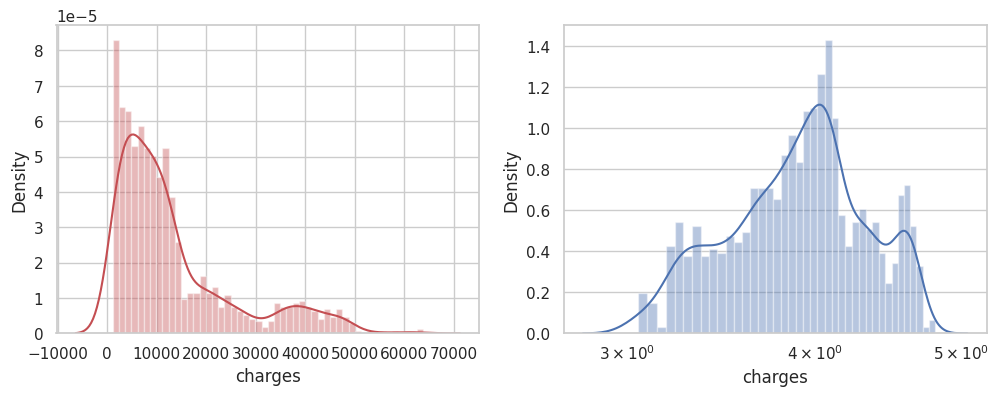

In [ ]:
f= plt.figure(figsize=(12,4))

ax=f.add_subplot(121)
sns.distplot(df['charges'],bins=50,color='r',ax=ax)

ax=f.add_subplot(122)
sns.distplot(np.log10(df['charges']),bins=40,color='b',ax=ax)
ax.set_xscale('log')

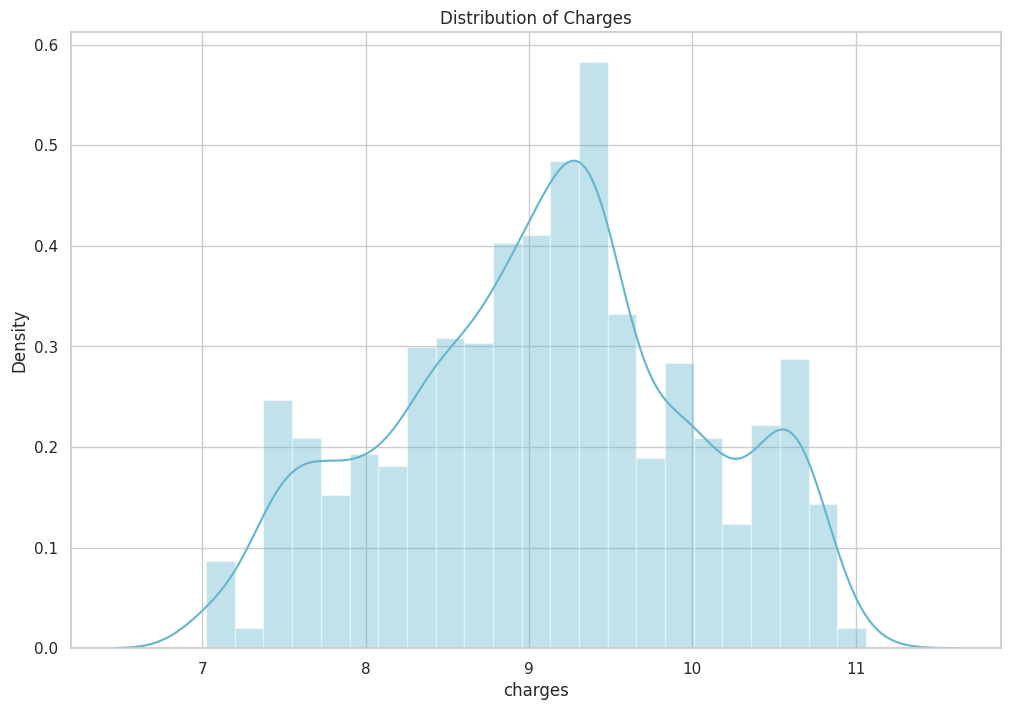

<Figure size 640x480 with 0 Axes>

In [ ]:
import warnings
warnings.filterwarnings('ignore')

sns.set(style='whitegrid')
f, ax = plt.subplots(1,1, figsize=(12, 8))
ax = sns.distplot(np.log(df['charges']), kde = True, color = 'c')
plt.title('Distribution of Charges')
plt.show()
# save the plot into a file
plt.savefig('Distribution_of_Charges.png')

In [ ]:
df['charges'] = np.log10(df['charges'])

# **Pemodelan dan Evaluasi**

## Import Libary Model

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.preprocessing import StandardScaler

## Split data ke X and y

In [ ]:
X = np.array(df[['age','sex','bmi','children','smoker','region','theta0']])
y = np.array(df[['charges']])
print(X.shape , y.shape)

(2772, 7) (2772, 1)


## Membagi data menjadi data pelatihan dan data pengujian


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

Hal ini dilakukan untuk memastikan bahwa model tidak mengalami overfitting terhadap data pelatihan serta untuk memperoleh metrik evaluasi model yang lebih akurat.

## Standarisasi Data

Sebelum melakukan pelatihan model, kita melakukan standarisasi terhadap data.


$$ \hat{X} = \frac{\hat{X} - mean}{std} $$

Proses ini dilakukan untuk setiap kolom dalam data. Tujuannya adalah agar data memiliki rata-rata (mean) nol dan standar deviasi sebesar 1.

In [ ]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
X_train_scaled.shape, X_test_scaled.shape

((2217, 7), (555, 7))

## Fungsi Hipotesis

$$ h(x) = \theta_{0} + \theta_{1}x_{1} + \theta_{2}x_{1}^{2} +  \theta_{3}x_{1}x_{2}…  + \theta_{n}x_{1}^{n} $$

In [ ]:
def hyp(theta,X):
    return np.dot(X,theta)

Fungsi hyp() digunakan untuk menghitung prediksi model regresi linear dengan mengalikan input X dan parameter theta. Hasilnya berupa array prediksi.

## Fungsi Cost

$$ J(\theta) = \frac{1}{2m} \sum_{i=1}^{m} (h_{\theta}(x^{(i)}) - y^{(i)})^2 $$

In [ ]:
def cost_function(theta,X,y):
    hx = hyp(theta,X) - y
    return float((np.dot(hx.T,hx))/(2*(X.shape[0])))

Fungsi cost_function() digunakan untuk menghitung nilai cost atau loss dari model regresi linear, yaitu seberapa jauh hasil prediksi (hyp(theta, X)) dari nilai aktual (y).


## Intialize theta as matrix of zeros

In [ ]:
initial_theta = np.zeros([X_train_scaled.shape[1],1])

cost_function(initial_theta,X_train_scaled,y_train)

7.902299398704406

Output dari baris ini adalah nilai cost awal — yang menunjukkan seberapa buruk model memprediksi sebelum dilakukan pelatihan (training). Biasanya, nilainya cukup besar karena theta belum dioptimalkan.

Langkah ini penting sebagai baseline sebelum dilakukan optimisasi seperti gradient descent.

In [ ]:
print(hyp(initial_theta,X_train_scaled).shape )
theta = initial_theta

(2217, 1)


Model menghasilkan 2217 prediksi nilai (satu untuk tiap sampel pelatihan), yang merupakan output dari fungsi hipotesis (hyp) saat menggunakan initial_theta.

## Gradient Descent
In this step we will update the values of theta using the formula,

$$ \theta_{j} = \theta_{j} - \alpha \frac{1}{m} \sum_{i=1}^{m} (h_{\theta}(x^{(i)}) - y^{(i)})x_{j}^{(i)} $$
(simaltaneously update $\theta_{j}$ for all j)

In [ ]:
m = X.shape[0]
alpha = 0.1
theta = initial_theta
cost_func_graph = []
epochs = 20
for i in range(epochs):
    theta = theta - (alpha/m)*(np.dot(X_train_scaled.T , hyp(theta,X_train_scaled) - y_train))
    cost_func_graph.append(cost_function(theta,X_train_scaled,y_train))

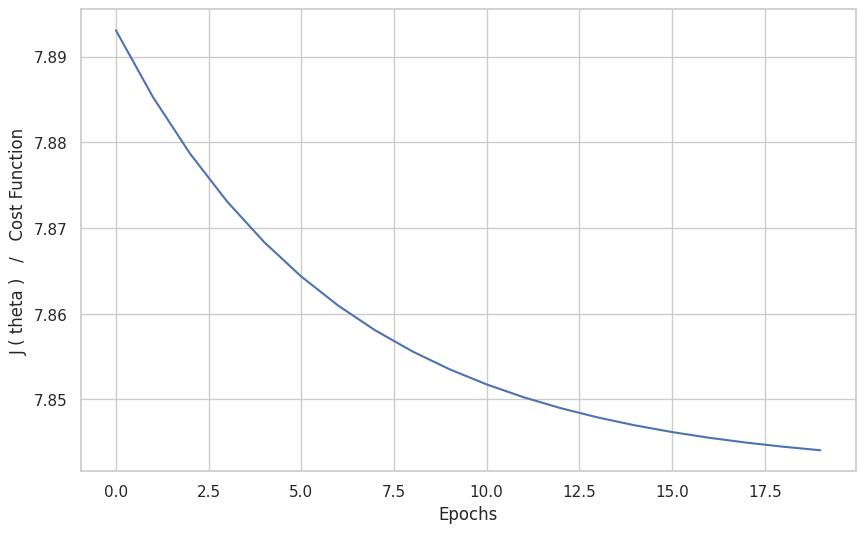

In [ ]:
plt.figure(figsize=(10,6))
plt.plot([i for i in range(epochs)][:],cost_func_graph[:])
plt.xlabel("Epochs")
plt.ylabel("J ( theta )   /   Cost Function")
plt.grid(True)

Grafik yang ditampilkan memperlihatkan penurunan nilai cost function (J(θ)) terhadap jumlah epoch.

Grafik menunjukkan garis menurun secara konsisten, artinya model berhasil belajar dan konvergen menuju minimum cost.

Gradient Descent berhasil mengurangi nilai cost function dari waktu ke waktu, yang berarti model semakin baik dalam memprediksi.

## Linear Regression

In [ ]:
# importing linear regression model
from sklearn.linear_model import LinearRegression
# instantiate linear regression model
lin_reg = LinearRegression()
# fit linear regression model
lin_reg.fit(X_train_scaled, y_train)
# predicting the response
y_pred = lin_reg.predict(X_test_scaled)

### Calculating metrics of the model

##### Mean absolute error
$$ MAE = \frac{1}{m} \sum_{i=1}^{m} \left( h_{\theta}(x^{(i)}) - y^{(i)} \right) $$

##### Mean squared error
$$ MSE = \frac{1}{m} \sum_{i=1}^{m} \left( h_{\theta}(x^{(i)}) - y^{(i)} \right)^2 $$

##### Root mean squared error
$$ RMSE = \sqrt{\frac{1}{m} \sum_{i=1}^{m} \left( h_{\theta}(x^{(i)}) - y^{(i)} \right)^2} $$

In [ ]:
print('Mean Absolute Error:',mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 0.12314436489880577
Mean Squared Error: 0.0376943176222734
Root Mean Squared Error: 0.19415024497093328


## Polynomial Regression

### Converting to Polynomial Features
$$ y = \theta_{0} + \theta_{1}x_{1} + \theta_{2}x_{1}^{2} +  \theta_{3}x_{1}x_{2}…  + \theta_{n}x_{1}^{n} $$

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn import preprocessing
scaler = StandardScaler()
degree = 2
polyreg = make_pipeline(PolynomialFeatures(degree),scaler,LinearRegression())
polyreg.fit(X_train,y_train)
y_pred = polyreg.predict(X_test)

In [ ]:
## Metrics
print('Mean Absolute Error:',mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 0.08715986287900916
Mean Squared Error: 0.026901394366042053
Root Mean Squared Error: 0.16401644541338548


# **Visualisasi Hasil Prediksi : Linear vs Polynomial Regression**

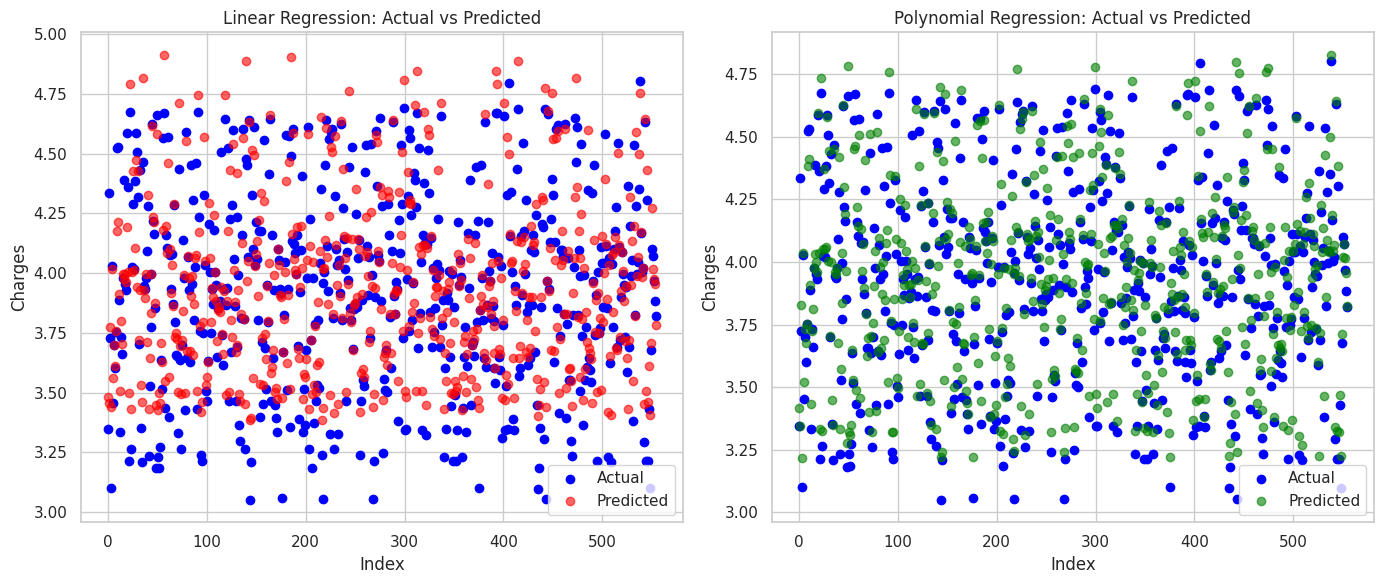

In [ ]:
plt.figure(figsize=(14,6))

# Linear Regression
plt.subplot(1, 2, 1)
plt.scatter(range(len(y_test)), y_test, color='blue', label='Actual')
plt.scatter(range(len(y_pred_linreg)), y_pred_linreg, color='red', alpha=0.6, label='Predicted')
plt.title("Linear Regression: Actual vs Predicted")
plt.xlabel("Index")
plt.ylabel("Charges")
plt.legend()

# Polynomial Regression
plt.subplot(1, 2, 2)
plt.scatter(range(len(y_test)), y_test, color='blue', label='Actual')
plt.scatter(range(len(y_pred_poly)), y_pred_poly, color='green', alpha=0.6, label='Predicted')
plt.title("Polynomial Regression: Actual vs Predicted")
plt.xlabel("Index")
plt.ylabel("Charges")
plt.legend()

plt.tight_layout()
plt.show()



 **Panel Kiri – Linear Regression**  
- **Titik Biru**: Nilai aktual (*Actual*)  
- **Titik Merah**: Hasil prediksi dari model Linear Regression (*Predicted*)  

**Pengamatan:**  
- Titik-titik merah menyebar cukup luas dari titik biru.
- Ini menandakan bahwa model Linear Regression **kurang mampu menangkap pola** dalam data, karena prediksinya sering meleset jauh dari nilai aktual.

---

 **Panel Kanan – Polynomial Regression**  
- **Titik Biru**: Nilai aktual (*Actual*)  
- **Titik Hijau**: Hasil prediksi dari model Polynomial Regression (*Predicted*)  

**Pengamatan:**  
- Titik hijau berada lebih dekat dengan titik biru dibanding panel kiri.
- Artinya, model Polynomial Regression **lebih akurat** dan mampu menangkap **kompleksitas hubungan** antara fitur dan target lebih baik daripada Linear Regression.


# **Hasil dan Kesimpulan**

Dari hasil evaluasi di atas, dapat disimpulkan bahwa **model regresi polinomial (degree = 2)** memberikan performa yang **lebih baik** dibandingkan regresi linear. Hal ini terlihat dari nilai error yang lebih rendah pada semua metrik evaluasi, yaitu:

- **Mean Absolute Error (MAE)**:  
  - Linear Regression: 0.1231  
  - Polynomial Regression: 0.0872

- **Mean Squared Error (MSE)**:  
  - Linear Regression: 0.0377  
  - Polynomial Regression: 0.0269

- **Root Mean Squared Error (RMSE)**:  
  - Linear Regression: 0.1942  
  - Polynomial Regression: 0.1640

---

**Asuransi** merupakan kebijakan finansial yang bertujuan untuk **mengurangi biaya** yang ditimbulkan akibat kecelakaan atau penyakit. Biaya ini dapat dipengaruhi oleh berbagai faktor seperti usia, BMI, jumlah anak, status merokok, dan wilayah tempat tinggal.

Melalui proyek ini, kita menggunakan beberapa teknik regresi untuk **memprediksi biaya asuransi** berdasarkan fitur-fitur tersebut, serta membandingkan performa model berdasarkan metrik evaluasi.

Model **Polynomial Regression memberikan performa yang lebih baik** dibandingkan Linear Regression, ditunjukkan dengan nilai error yang lebih kecil pada semua metrik (MAE, MSE, dan RMSE).  
Ini mengindikasikan bahwa **hubungan antara fitur dan target tidak sepenuhnya linear**, dan model polinomial dapat menangkap kompleksitas hubungan tersebut dengan lebih baik.
